<a href="https://colab.research.google.com/github/mgw54/Colab_Clones/blob/main/AKTAdata_Master_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Master AKTA Data Analyser 3000

AKTA .csv results figures made very simple and very very pretty

Select your AKTA data type from the drop-down list below and upload file

In [ ]:


data_type = 'AEC' # @param ["AEC", "SEC"]

#@markdown  - provide a jobname e.g. 20231129_mgw54_python_horseplay
jobname = '20250210_H102A_SEC' #@param {type:"string"}

from google.colab import files
import numpy as np
import pandas as pd
from tkinter import Tk     # from tkinter import Tk for Python 3.x
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt
import os
import time


#@markdown - Upload your .xls AKTA data using the option at the bottom of
#@markdown this cell

from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))


import io
df = pd.read_excel(io.BytesIO(uploaded[filename]))




print(df)
rows1 = len(df.index)




Saving 20250515_WT_RU_Prep.xls to 20250515_WT_RU_Prep (1).xls
                                              10 Unnamed: 1  \
0    20250515 WT Ru MonoQ 8mL Prep Frac001:10_UV        NaN   
1                                             ml        mAU   
2                                              0      1.476   
3                                       0.129889      1.557   
4                                       0.259777       1.52   
..                                           ...        ...   
944                                   122.355177    -17.651   
945                                   122.485065    -17.085   
946                                   122.614954    -16.609   
947                                   122.744843    -16.054   
948                                   122.874731    -15.479   

                                              10.1 Unnamed: 3  \
0    20250515 WT Ru MonoQ 8mL Prep Frac001:10_Cond        NaN   
1                                               ml 

In [ ]:
#@markdown This next bit requires some work from you
#@markdown - you need to search the data frame above to find the start of the %B column. this can vary depending on what data was included in the data extraction
#@markdown - take note note of the 'Unnamed: x' number and the 10.y numbers and input them below


pcb_unnamed_x = 5 # @param {type:"slider", min:0, max:9, step:1}

pcb_10_y = 10.2 # @param {type:"slider", min:10.1, max:10.9, step:0.1}


#@markdown please now do the same for (fractions)

frac_unnamed_x = 7 # @param {type:"slider", min:0, max:9, step:1}

frac_10_y = 10.3 # @param {type:"slider", min:10.1, max:10.9, step:0.1}

print("SECTION COMPLETE. Please progress to next section")

SECTION COMPLETE. Please progress to next section


In [ ]:
#@markdown Making little data frames with just the data we need

volsdf = df.tail(-3)["10"]

A280df = df.tail(-3)["Unnamed: 1"]

percentbdf = df.tail(-3)[f"Unnamed: {pcb_unnamed_x}"]

percentbvolsdf = df.tail(-3)[str(pcb_10_y)]
percentbvolsdf = percentbvolsdf.fillna(0)

fractiondf = df.tail(-3)[f"Unnamed: {frac_unnamed_x}"]
fractiondf = fractiondf.fillna(0)

fractionvolsdf = df.tail(-3)[str(frac_10_y)]
fractionvolsdf = fractionvolsdf.fillna(0)

if data_type == 'AEC':
  sumdf1 = pd.DataFrame(data={'vol': volsdf,
                          'A280': A280df,
                          'percentb': percentbdf,
                           'fraction': fractiondf})
  sumdf1 = sumdf1.fillna(0)
elif data_type == 'SEC':
  sumdf1 = pd.DataFrame(data={'vol': volsdf,
                          'A280': A280df,
                           'fraction': fractiondf})
  sumdf1 = sumdf1.fillna(0)
else:
  print("ERROR: incorrect data type chosen")

print("SECTION COMPLETE. Please progress to next section")


SECTION COMPLETE. Please progress to next section


<ipython-input-8-dfe3afd48eb4>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  percentbvolsdf = percentbvolsdf.fillna(0)
<ipython-input-8-dfe3afd48eb4>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fractionvolsdf = fractionvolsdf.fillna(0)
<ipython-input-8-dfe3afd48eb4>:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sumdf1 = sumd

user parameters uptaken...
plotting A280 data...
A280 data plotted. Plotting %B...
%B plotted. plotting elution fractions...
Elution fractions plotted. correcting axes to user values...
printing plot...


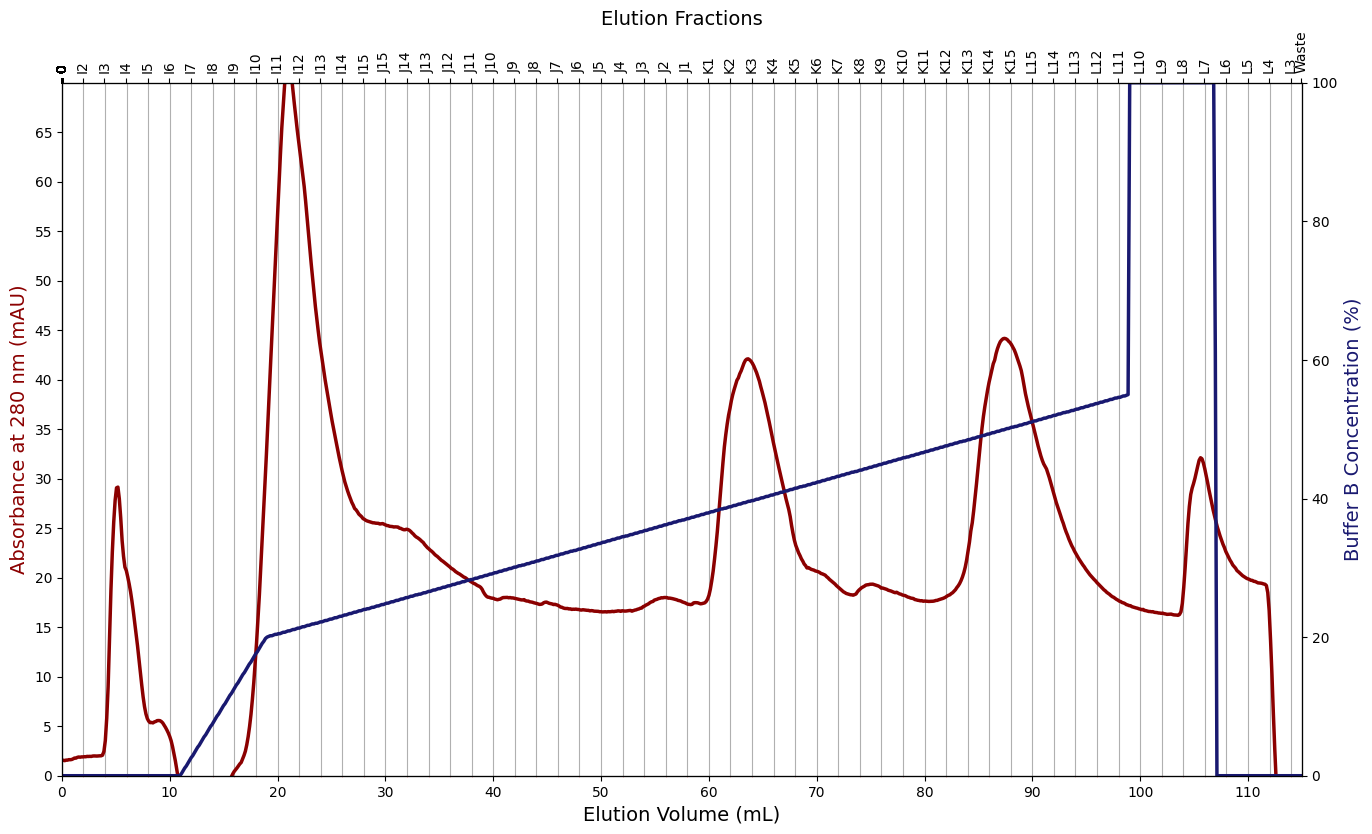

File not saved
Done!


In [ ]:
#@markdown Alter the design of the plot to suit your needs

#@markdown - Do you want elution fractions displayed on your image?
fraction_boolean = True # @param {type:"boolean"}
griddylines = True # @param {type:"boolean"}
grid_increment = 2 # @param {type:"number"}


#@markdown - Set minimum and maximum X and Y values for the graph. This may require some trial and error

min_x_val = 0 # @param {type:"number"}
max_x_val = 115 # @param {type:"number"}
min_y_val = 0 # @param {type:"number"}
max_y_val = 70 # @param {type:"number"}

#@markdown - Select the increments for your axes

inc_x = 10 # @param {type:"number"}
inc_y = 5 # @param {type:"number"}

#@markdown - do you wish to save your file?

save_file = False # @param {type:"boolean"}

#@markdown - saved files will be automatically downloaded to your downloads folder

print("user parameters uptaken...")


# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(16,9))
print("plotting A280 data...")

# set x-axis label
ax.set_xlabel("Elution Volume (mL)", fontsize = 14, fontname = 'DejaVu Sans')
# set y-axis label
ax.set_ylabel("Absorbance at 280 nm (mAU)",
              color="darkred",
              fontsize=14, fontname = 'DejaVu Sans')

plt.xticks(np.arange(min_x_val, max_x_val, inc_x))

plt.yticks(np.arange(min_y_val, max_y_val, inc_y))


plt.axis([min_x_val, max_x_val, min_y_val, max_y_val])


if griddylines == True:
  def generate_number_list(min_val, max_val, increment):
      return list(np.arange(min_val, max_val + increment, increment))
  ax.set_xticks(generate_number_list(min_x_val, max_x_val, grid_increment), minor=True)
  ax.tick_params(which='minor', length=0.5, color='r')
  plt.grid(True, which='minor', axis='x')  # Add this line to enable grid
  plt.grid(True, which='major', axis='x')

print("A280 data plotted. Plotting %B...")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot
ax.plot(volsdf,
        A280df,
        color="darkred", linewidth = 2.5)





# make a plot with different y-axis using second axis object
if data_type == 'AEC':
  plt.axis([min_x_val, max_x_val, 0, 100])
  ax2.plot(percentbvolsdf, percentbdf,color="midnightblue", linewidth = 2.5)
  ax2.set_ylabel("Buffer B Concentration (%)",color="midnightblue",fontsize=14, fontname = 'DejaVu Sans')

  plt.xticks(np.arange(min_x_val, max_x_val, inc_x))
else: print("No %B values shown, data_type == SEC")

print("%B plotted. plotting elution fractions...")


# twin object for two different y-axis on the sample plot
if fraction_boolean == True:
  ax3=ax.twiny()
  ax3.set_xlim(ax2.get_xlim())
  new_tick_locations = np.array(fractionvolsdf)
  ax3.set_xticks(new_tick_locations)
  ax3.set_xticklabels(fractiondf, fontsize=10, rotation=90)
  ax3.set_xlabel(r"Elution Fractions", fontsize=14, fontname = 'DejaVu Sans')
else:
  print("No elution fractions displayed")

print("Elution fractions plotted. correcting axes to user values...")

if fraction_boolean == True:
  plt.axis([min_x_val, max_x_val, min_y_val, max_y_val])
else:
  print("")

print("printing plot...")


plt.show()

# save the plot as a file


if save_file == True:
  fig.savefig(f'{jobname}.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')
  files.download(f'{jobname}.jpg')
  print("downloading plot...")
else:
  print("File not saved")


print("Done!")